In [1]:
import pandas as pd
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt

In [2]:
config = {
    "base_dir":        "/eos/home-b/bpinolin/ML_output/",
    "plot_config":     "VBSOS",
    "cut":             "sr",
    "samples_version": "mjj_v7/top_WW/highZ",
    "cols": [
             'detajj',
             'ptll',
             'detall',        
             'jetpt1', 
             'jetpt2', 
             'met',
             'dphill',
             'dphijj',
             'Mll',
             'dR_jl1',
             'dR_jl2',
             'mjj',
             'Zepp1',
             'Zepp2',
             'qgl_forward',
             'qgl_central',
             'mtw1',
             'mtw2'
            ],
}

In [3]:
ye = "2017"

In [4]:
# import os

# config_base_dir = os.path.join(config["base_dir"], config["plot_config"])
# # load numpy
# samples_dir = os.path.join(config_base_dir, config["cut"] , "samples", config["samples_version"])
# file_sig_bal = os.path.join(samples_dir, "for_training/signal_balanced.pkl")
# file_bkg_bal = os.path.join(samples_dir, "for_training/background_balanced.pkl")

In [5]:
import os

config_base_dir = os.path.join(config["base_dir"], config["plot_config"])
# load numpy
samples_dir = os.path.join(config_base_dir, config["cut"] , "samples", config["samples_version"])
file_sig_bal = os.path.join(samples_dir, "for_training_"+ye+"/signal_balanced.pkl")
file_bkg_bal = os.path.join(samples_dir, "for_training_"+ye+"/background_balanced.pkl")

In [6]:
import pickle
signal = pickle.load(open(file_sig_bal, "rb"))
bkg = pickle.load(open(file_bkg_bal, "rb"))

In [7]:
bkg = bkg.dropna()
signal = signal.dropna()

## Comparing train and test

## Plotting weights

fig = plt.figure(figsize=(6,5), dpi=100)
_ = plt.hist(bkg["puWeight"], bins=100, histtype="step", density=True, label="top", color='blue')
plt.title("puWeight Background with 0-weight events")
plt.show()

## Check weights Wnn

## Plotting all variables

## Extracting mjj for ROC

In [8]:
#v7 top+WW loose
low_sig = 145
low_bkg = 1903

low_sig_2016 = 31
low_bkg_2016 = 493
low_sig_2017 = 42
low_bkg_2017 = 555
low_sig_2018 = 72
low_bkg_2018 = 854

high_sig = 59
high_bkg = 1824

high_sig_2016 = 11
high_bkg_2016 = 470
high_sig_2017 = 17
high_bkg_2017 = 532
high_sig_2018 = 30
high_bkg_2018 = 820

In [9]:
eS = round(signal.weight_.sum()/high_sig_2017,3)
eB = round(bkg.weight_.sum()/high_bkg_2017,3)

print("Queste percentuali vengono utilizzate per la ROC di mjj")
print("% signal = ", eS)
print("% bkg = ", eB)

Queste percentuali vengono utilizzate per la ROC di mjj
% signal =  0.747
% bkg =  0.435


In [10]:
bins = 26

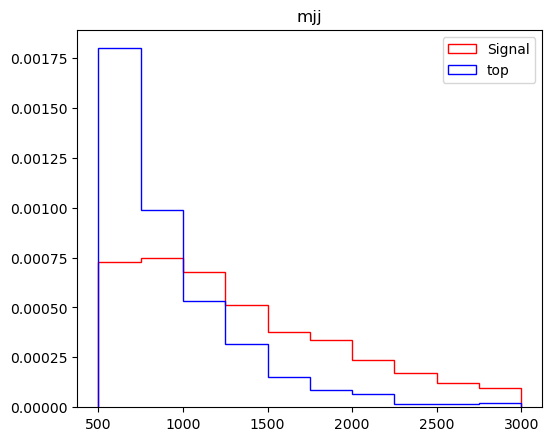

In [11]:
fig = plt.figure(figsize=(6,5), dpi=100)
_ = plt.hist(signal["mjj"], bins=10, histtype="step", label="Signal", color='red', density = True, range=(500,3000))
_ = plt.hist(bkg["mjj"], bins=10, histtype="step", label="top", color='blue', density = True, range=(500,3000))
plt.legend()
plt.title("mjj")
plt.show()

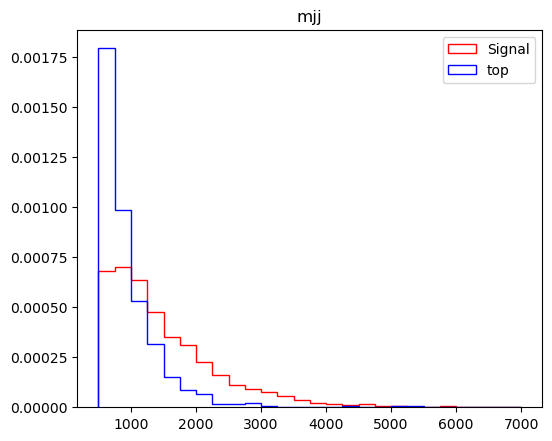

In [12]:
fig = plt.figure(figsize=(6,5), dpi=100)
_ = plt.hist(signal["mjj"], bins=bins, histtype="step", label="Signal", color='red', density = True, range=(500,7000))
_ = plt.hist(bkg["mjj"], bins=bins, histtype="step", label="top", color='blue', density = True, range=(500,7000))
plt.legend()
plt.title("mjj")
plt.show()

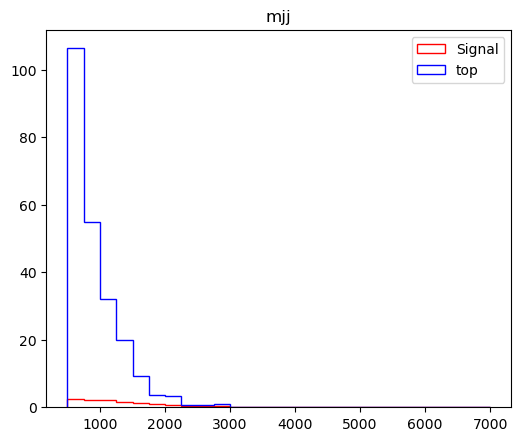

In [13]:
fig = plt.figure(figsize=(6,5), dpi=100)
n_sig, b, _ = plt.hist(signal["mjj"], bins=bins, histtype="step", weights=signal["weight_"], label="Signal", color='red', range=(500,7000))
n_bkg, b, _ = plt.hist(bkg["mjj"], bins=bins, histtype="step", weights=bkg["weight_"], label="top", color='blue', range=(500,7000))
plt.legend()
plt.title("mjj")
plt.show()

In [14]:
s_n = 0 
for i in range (10,26):
    s_n = n_sig[i]+s_n
n_sig[9] = n_sig[9]+s_n
n_sig = n_sig[0:10]

In [15]:
b_n = 0 
for i in range (10,26):
    b_n = n_bkg[i]+b_n
n_bkg[9] = n_bkg[9]+b_n
n_bkg = n_bkg[0:10]

In [16]:
effS = np.array([])
effB = np.array([])

for i in range(len(n_sig)):
    i = i+1
    S = sum(n_sig[-i:len(n_sig)])
    effS = np.append(effS, S/sum(n_sig))
    
for j in range(len(n_bkg)):
    j = j+1
    B = sum(n_bkg[-j:len(n_bkg)])
    effB = np.append(effB, B/sum(n_bkg))

In [17]:
# Considero efficienza di segnale e fondo delle selezioni
import numpy as np

new_effS = np.array([])
new_effB = np.array([])

for i in range (len(effS)):
    add = effS[i]*eS
    new_effS = np.append(new_effS, add)

for i in range (len(effB)):
    add = effB[i]*eB
    new_effB = np.append(new_effB, add)

In [18]:
print(new_effS.tolist())
print(new_effB.tolist())

[0.05407355753546939, 0.07263090420745363, 0.0999914710503162, 0.13943465950678852, 0.19605338475931, 0.2651784802812508, 0.3573922741362265, 0.47851987802869206, 0.6101925520392124, 0.747]
[0.0016393981552189232, 0.003054447791857279, 0.00421258154064431, 0.010378679358417523, 0.017137355259180736, 0.034324859763294586, 0.07160819919629002, 0.13186794386741496, 0.23496237687053165, 0.435]


In [19]:
#highZ
effS = [0, 0.05159226015957822, 0.07214194349625715, 0.0956193362925989, 0.1350886943047355, 0.18579459753254737, 0.25651683443271217, 0.34264551661935705, 0.4576258762032668, 0.5885600907891492, 0.72]
effB = [0, 0.0033085801177216547, 0.005724267845254365, 0.008258929043057545, 0.014256364058895687, 0.023577428422127386, 0.0434167110740181, 0.07756741340809739, 0.1368924309002695, 0.24198437224593516, 0.44]

In [20]:
#highZ 2016
effS_2016 = [0, 0.05380802597897315, 0.0701935440419858, 0.10125281871820904, 0.13793647034646125, 0.18431804830829304, 0.26823062717535484, 0.3546356961574026, 0.4804557434669528, 0.6378114521818993, 0.786]
effB_2016 = [0, 0.00264040273798799, 0.004190749349595994, 0.006794664988370699, 0.011793694881092947, 0.022608041524389163, 0.04152595932484219, 0.07045653643910822, 0.12847112271763725, 0.2349367168502759, 0.434]

In [21]:
#highZ 2017
effS_2017 = [0, 0.05407355753546939, 0.07263090420745363, 0.0999914710503162, 0.13943465950678852, 0.19605338475931, 0.2651784802812508, 0.3573922741362265, 0.47851987802869206, 0.6101925520392124, 0.747]
effB_2017 = [0, 0.0016393981552189232, 0.003054447791857279, 0.00421258154064431, 0.010378679358417523, 0.017137355259180736, 0.034324859763294586, 0.07160819919629002, 0.13186794386741496, 0.23496237687053165, 0.435]

In [22]:
#highZ 2018
effS_2018 = [0, 0.05105706145389535, 0.07493180730523896, 0.0941963495291841, 0.1359886268585641, 0.1865824060995558, 0.2556830700269535, 0.3410715324177613, 0.45234683758912725, 0.5774516649886237, 0.704]
effB_2018 = [0, 0.004777481732930086, 0.008340388262005425, 0.011730833182258909, 0.018195190540619573, 0.028330768399177073, 0.05043380780459729, 0.0855665764089809, 0.14507825759781529, 0.25075527778065576, 0.447]

In [23]:
#lowZ
effS = [0, 0.05921764471472966, 0.08113918097565394, 0.11201119364444732, 0.1532978767386876, 0.20567130996274324, 0.27402648951058795, 0.3582544143664585, 0.4648048728848857, 0.5851677585123848, 0.697]
effB = [0, 0.0041309496555800695, 0.005768270915204816, 0.009539628161946204, 0.014252853995835346, 0.021711888509408275, 0.03643450750886549, 0.06254971579812878, 0.11182204118445911, 0.20350743201846141, 0.393]

In [24]:
#lowZ_2016
effS_2016 = [0, 0.05407557101768713, 0.07565668807506448, 0.10549868807308381, 0.13527000560276647, 0.19298778006417167, 0.2630507191258994, 0.3417570530978811, 0.4478112690382182, 0.5691038766871134, 0.685]
effB_2016 = [0, 0.003594307961747034, 0.005586053569671899, 0.008628224251351376, 0.012353417388146763, 0.01917687085963256, 0.031690186335024226, 0.05652681177696748, 0.09636744567222975, 0.17942395179340861, 0.366]

In [25]:
#lowZ_2017
effS_2017 = [0, 0.05161780325108563, 0.0692147928061122, 0.09777085233239342, 0.138747133618037, 0.18843625754713797, 0.2548697171612336, 0.3427587457994873, 0.44820830894019603, 0.5757442887157196, 0.689]
effB_2017 = [0, 0.005049891165914777, 0.005488364960916574, 0.009830015144609811, 0.01477114938521758, 0.02156202618105251, 0.038591417299234335, 0.06089133949336431, 0.11776412533312047, 0.2148337314299521, 0.411]

In [26]:
#lowZ_2018
effS_2018 = [0, 0.06596513246883429, 0.09059333853969168, 0.12331182854781304, 0.16980638885737212, 0.2215328413510011, 0.2903884362287602, 0.37499809381020177, 0.4825827583215006, 0.5985610069564808, 0.708]
effB_2018 = [0, 0.0038548092146939374, 0.0060719513444135184, 0.00990450699312245, 0.015054177773303722, 0.02333662559239239, 0.037877044239967524, 0.06728810907419587, 0.11720758466436591, 0.21063626992666656, 0.398]